In [1]:
from filtros import *
from fit_voc import *

In [2]:
import pandas as pd
import numpy as np
import os

# Ajustamos los parámetros del modelo con una curva de descarga

In [52]:
df = pd.read_csv(os.path.join('C:/Users/Bruno/Dropbox','Dataset Stanford', 'W10', 'C1.csv'))
print(df.exp.unique())
df = df[df.exp == 0]
df = df[df.step_ind == 14]
df


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


,step_ind,current,voltage,ch_cap,dis_cap,time,SoH,exp,SoC
16550,14,0.006660,3.969064,7.484056e-07,0.970024,16536.725252,4.865884,0,0.839443
16551,14,0.000877,3.969567,7.869031e-07,0.970025,16536.825152,4.865884,0,0.839443
16552,14,-0.006165,3.969320,9.023184e-07,0.970024,16536.925152,4.865884,0,0.839443
16553,14,-0.007080,3.969536,9.023184e-07,0.970025,16537.025252,4.865884,0,0.839443
16554,14,-0.003601,3.969893,9.023184e-07,0.970025,16537.124652,4.865884,0,0.839443
...,...,...,...,...,...,...,...,...,...
204887,14,-1.588593,3.378190,9.138325e-01,4.793618,35370.425652,4.865884,0,0.357840
204888,14,-1.574165,3.378395,9.138325e-01,4.793662,35370.524852,4.865884,0,0.357833
204889,14,-1.562843,3.379012,9.138325e-01,4.793707,35370.625452,4.865884,0,0.357826
204890,14,-1.547554,3.378993,9.138325e-01,4.793751,35370.725252,4.865884,0,0.357819


In [31]:
df.SoH.values

array([4.86588439, 4.86588439, 4.86588439, ..., 4.86588439, 4.86588439,
       4.86588439])

In [55]:
# Voltaje, corriente y soc
V = df.voltage.values
I = df.current.values
SoC = df.SoC.values
SoH = df.SoH.values

In [35]:
print(SoH)

[4.86588439 4.86588439 4.86588439 ... 4.86588439 4.86588439 4.86588439]


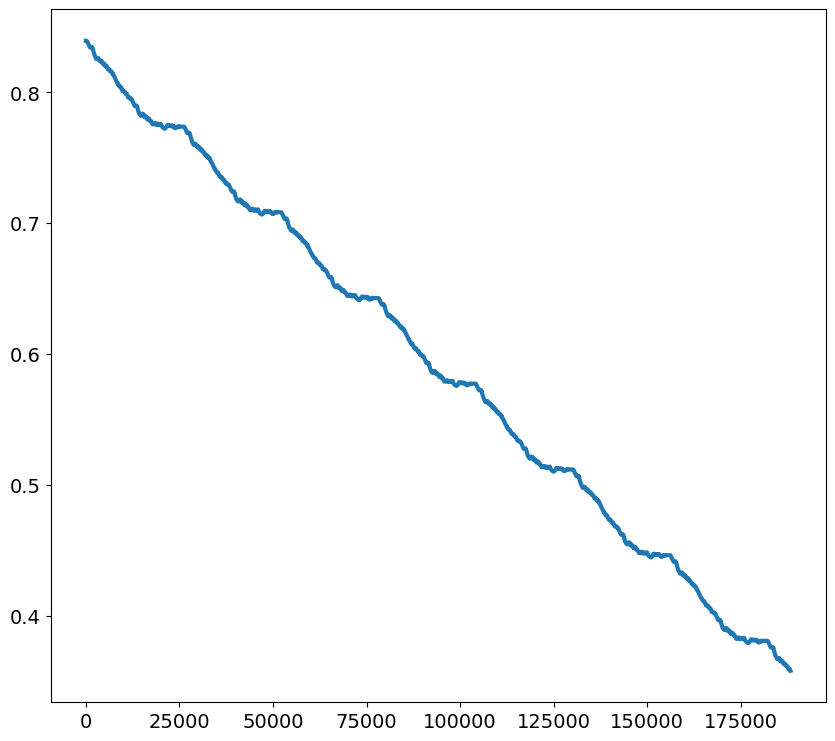

In [56]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,7))
# plt.plot(V)
# plt.show()
# plt.figure(figsize=(20,7))
# plt.plot(I)
# plt.show()
# plt.figure(figsize=(20,7))
plt.plot(SoC)
plt.show()

In [6]:
# # Generamos los parámetros del modelo mediante la optimización
# opts = {'swarmsize': 150, 'maxiter': 150, 'minstep': 1e-8, 'minfunc': 1e-8}

# # r:  V_L, V_0, Gamma, Alpha, Beta, R
# r = optimizar_con_pso(I, V, SoC)

# # r: V_L, V_0, Gamma, Alpha, Beta, factor, bias
# r2 = optimizar_con_pso_operacional_esc(I,V,SoC,r['Parámetros optimizados'],0.5,1.5 ,opts  )

# print(r)
# print(r2)

KeyboardInterrupt: 

# Iniciamos el proceso de filtrado

In [5]:
f = FiltrosAnidados()
#param = dict(
#        vL=r2['Parámetros optimizados'][0],
#        v0=r2['Parámetros optimizados'][1],
#        gamma=r2['Parámetros optimizados'][2],
#        alpha=r2['Parámetros optimizados'][3],
#        beta=r2['Parámetros optimizados'][4],
#        Factor_Rint=r2['Parámetros optimizados'][5],
#        Bias_Rint=r2['Parámetros optimizados'][6],
#        Qmax=df.SoH.mean(),
#        life_cycles=300,
#    )

param = dict(
    vL=1.35531394,
    v0=4.12017677,
    gamma=0.13286143,
    alpha=0.16945463,
    beta=2.34538224,
    # Qmax=4.8659,
    Qmax=df.SoH.mean(),
    Bias_Rint=0.01454392,
    Factor_Rint=0.1879029,
    life_cycles=300,
)

f.Q_inst = param.get("Qmax")
f.fit_batt_model(param)
f.modelo_th.fit_inverse()


Parámetros del modelo:
{'A_Rint': 0.3084,
 'B_Rint': -0.2578,
 'Bias_Rint': 0.01454392,
 'C_Rint': -0.05083,
 'D_Rint': 0.1317,
 'Factor_R_SOH0': 0.28371948548,
 'Factor_R_SOH1': -0.57276721458,
 'Factor_R_SOH2': 0.32037195027000004,
 'Factor_R_SOH3': 0.02140399288,
 'Factor_Rint': 0.1879029,
 'Qmax': 4.865884391243257,
 'alpha': 0.16945463,
 'beta': 2.34538224,
 'degradation_data': {'100-0': [1.0, 1.0, 1.0],
                      '100-25': [1.000003, 1.00000266, 1.00000193],
                      '100-50': [0.999989, 0.99999203, 0.9999942],
                      '100-75': [1.000027, 1.00002146, 1.00001563],
                      '25-0': [1.000054, 1.00004184, 1.00003047],
                      '50-0': [1.000037, 1.00002874, 1.00002093],
                      '50-25': [1.000043, 1.00003347, 1.00002438],
                      '62.5-37.5': [1.000008, 1.0000062, 1.00000451],
                      '75-0': [1.000024, 1.0000186, 1.00001354],
                      '75-25': [1.000019, 1.000015

In [6]:
# Ajustamos los parámetros del estimaodor
f.voc_thresh = 0.05
f.voc_times = 47
f.sigma_autonomia = 0.04
f.sigma_capacidad = 0.001 * 5
f.estim_kwargs = {"sigma_e": 0.00075}


In [42]:
# Iniciamos las configuraciones para el proceso de filtrado
path = os.path.join('C:/Users/Bruno/Dropbox','Dataset Stanford', 'W10')

files = os.listdir(path)
files.sort(key=lambda x: int(x[1 : x.find(".")]))
print(files)

q_healthy = param.get("Qmax")
q_std = 0.0008   * param.get("Qmax")

# Generamos las partículas
N = 50
particulas_soc = np.random.uniform(0.2, 1, N)
pesos_soc = np.ones(N) / N

particulas_q = np.random.uniform(4.7, 4.9, N)
pesos_q = np.ones(N) / N

# Valor se SoC acumulado. Nos dirá cuándo se cumple un ciclo equivalente
soc_acc = 0
soc_filt = []

Q_inst_values = []
knn_SoH_values = [q_healthy]


points_f = []
estimaciones_q = []
factores_q = []

['C1.csv', 'C2.csv', 'C3.csv', 'C4.csv', 'C5.csv', 'C6.csv', 'C7.csv', 'C8.csv', 'C9.csv', 'C10.csv', 'C11.csv', 'C12.csv', 'C13.csv', 'C14.csv']


In [45]:
# Iteramos por todos los datasets
for file in files:
    if not ".csv" in file:
        continue
    cycle = file[: file.find(".")]


    cap_list = []  # dataset, estimador, modelo, filtro
    part_filt_list = []  # partícula, pesos
    intresting_points_list = []  # puntos interesantes

    df = pd.read_csv(os.path.join(path, file))

    # iteramos por cada experimento obteniendo estimaciones
    for cnt, exp in enumerate(df.exp.unique()):
        # if cnt % 5:continue
        print("\n", file, cnt)
        
        df_ = df[df.exp == exp]
        # probamos filtrar el soc y las estimaciones de forma simultánea, solo consideramos datos cunado el experimento es 14
        for ind, (c, c_, v, dt, step) in enumerate(zip(
                                                        df_.current.values[1:],
                                                        df_.current.values,
                                                        df_.voltage.values[1:],
                                                        df_.time.values[1:] - df_.time.values[:-1],
                                                        df_.step_ind.values[1:],
                                                    )):

            # Filtramos el SoC
            particulas_soc, pesos_soc, soc_ponderado, v_part = f.filtrar_soc(
                particulas_soc, pesos_soc, v, c, c_, dt
            )
            sumando = dt * abs(c) / (f.Q_inst * 3600) if c < 0 else 0
            soc_acc += sumando  # variable que usamos para verificar cuándo se cumple el ciclo equivalente

            soc_filt.append(soc_ponderado)
            # print(f"step: {step}")
            # print(f"type soc_acc: {type(soc_acc)}")
            # print(f"soc_acc: {soc_acc}")
            print(f"{step}\t{soc_acc}", end="\r")
            # print(f"{step}\t{soc_acc:.3f}", end="\r")

            # # Colectamos puntos del voltaje en circuito abierto cunando sea necesario
            # if step == 14:  # Si estamos en puntos con descarga realista

            #     _ = f.detect_iterest_points(v, c, dt, False)


            if 1 <= soc_acc:
                #if len(factores_q) != 0:

                    # Estimamos con ML con los datos
                    # q_estim = f.estimate_ML((3,5), log=True)
                    # q_estim = f.estimate_ML(np.clip([f.Q_inst-4.8659*0.01,f.Q_inst+4.8659*0.01],3,4.8659), log=True)
                    # estimaciones_q = np.array(estimaciones_q)
                    # factores_q = np.array(factores_q)

                    # q_estim = np.sum(factores_q / sum(factores_q) * estimaciones_q)
                    #q_estim = estimaciones_q[np.argmax(factores_q)]
                    #q_estim_ = np.clip(q_estim, 0, q_healthy)

                    # Obtenemos las predicciones del modelo

                factor = f.get_factor(soc_filt)

                    # Obtenemos el modelo filtrado
                    #particulas_q, pesos_q, capacidad_ponderada = f.filtrar_q(
                    #    particulas_q, pesos_q, soc_filt, q_estim_, q_std
                    #)

                    #cap_list.append(
                    #    [
                    #        df_.SoH.mean(),
                    #        q_estim_,
                    #        q_estim,
                    #        f.Q_inst * factor,
                    #        capacidad_ponderada,
                    #    ]
                    #)
                    #part_filt_list.append([particulas_q, pesos_q])
                    #intresting_points_list.append(points_f)

                    # print('\n',f.detected_points.shape, f.Q_inst, q_estim,capacidad_ponderada,df_.SoH.mean() )
                    #print(factores_q)
                    #print(estimaciones_q)
                    #print(
                    #    q_estim / q_healthy * 100,
                    #    abs(q_estim_) / q_healthy * 100,
                    #    (capacidad_ponderada) / q_healthy * 100,
                    #    df_.SoH.mean() / q_healthy * 100,
                    #)
                    #print(
                    #    abs(q_estim - df_.SoH.mean()) / q_healthy * 100,
                    #    abs(q_estim_ - df_.SoH.mean()) / q_healthy * 100,
                    #    abs(capacidad_ponderada - df_.SoH.mean()) / q_healthy * 100,
                    #    "\n",
                    #)

                    # Reseteamos las variables de memoria en el estimador
                    # f.reset_detector([1, 1])
                    #soc_filt = []
                    #estimaciones_q = []
                    #factores_q = []
                soc_acc = 0

                    # Ajustamos la capacidad instantánea
                f.Q_inst *= factor
                knn_SoH_values.append(f.Q_inst)
                #else:
                #    print(factores_q)
                #    soc_acc = 0
#
                #    print("No se encontraron puntos para estimar")
                #    cap_list.append(
                #        [
                #            df_.SoH.mean(),
                #            np.NaN,
                #            np.NaN,
                #            np.NaN,
                #            np.NaN,
                #        ]
                #    )
                #    part_filt_list.append([particulas_q, pesos_q])
                #    intresting_points_list.append(points_f)

        # Reseteamos las variables de memoria en el estimador
        #if not f.detected_points is None:
        #    estimaciones_q.append(f.estimate_ML((3, 7), log=True))
        #    factores_q.append(len(f.detected_points))
        #    points_f.append(f.detected_points)
#
        #f.reset_detector([1, 1])


 C1.csv 0
14	[0.98726751]-05]
 C1.csv 1
14	[0.97518374]-05]
 C1.csv 2
14	[0.9637998]]-05]
 C1.csv 3
14	[0.95310662]-05]
 C1.csv 4
14	[0.94302172]-05]
 C1.csv 5
14	[0.9337117]]05]
 C1.csv 6
14	[0.9249992]]-05]
 C1.csv 7
14	[0.91700513]05]
 C1.csv 8
14	[0.9097511]]-05]
 C1.csv 9
14	[0.90318197]-05]
 C1.csv 10
14	[0.89732464]-05]
 C1.csv 11
14	[0.89210793]-05]
 C1.csv 12
14	[0.88761738]-05]
 C1.csv 13
14	[0.88376006]-05]
 C1.csv 14
14	[0.88067256]05]
 C1.csv 15
14	[0.87826458]-05]
 C1.csv 16
14	[0.87655163]-05]
 C1.csv 17
14	[0.8754894]]]
 C1.csv 18
14	[0.87515971]-05]
 C1.csv 19
14	[0.87551229]-05]
 C1.csv 20
14	[0.87661781]-05]
 C1.csv 21
14	[0.87839044]-05]
 C1.csv 22
14	[0.8808903]]-05]
 C1.csv 23
14	[0.88410517]-05]
 C1.csv 24
14	[0.88798979]05]
 C2.csv 0
14	[0.89262772]-05]
 C2.csv 1
14	[0.89798937]-05]
 C2.csv 2
14	[0.90399109]-05]
 C2.csv 3
14	[0.91074958]-05]
 C2.csv 4
14	[0.91818332]-05]
 C2.csv 5
14	[0.92638434]-05]
 C2.csv 6
14	[0.93520572]-05]
 C2.csv 7
14	[0.94481467]-05]
 

KeyboardInterrupt: 

In [49]:
knn_SoH_values

[4.865884391243257,
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67838403]),
 array([4.67